# DATA COUNTRY:

## EXPLORATORY DATA ANALYSIS :

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings("ignore")

In [89]:
data = pd.read_csv("Country-data.csv")

In [90]:
df = data.copy()

In [91]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Analyse de forme:

### Analyse du tableau :

In [92]:
df.shape

(167, 10)

On a donc un tableau avec 167 lignes et 10 colonnes à étudier.

In [93]:
df.dtypes.value_counts()

float64    7
int64      2
object     1
dtype: int64

<Axes: >

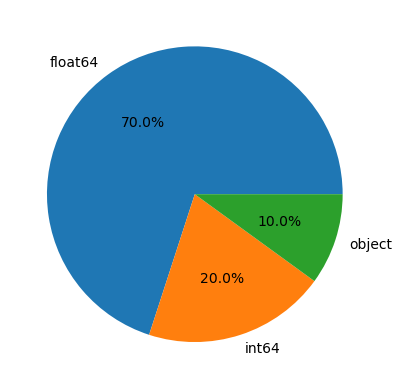

In [94]:
def pct(pct):
    return str(round(pct, 2)) + '%'
df.dtypes.value_counts().plot.pie(autopct=pct)

On a  un tableau avec plus de variable quantitatives que qualitative .

#### Analyses des valeurs manquantes :

<Axes: >

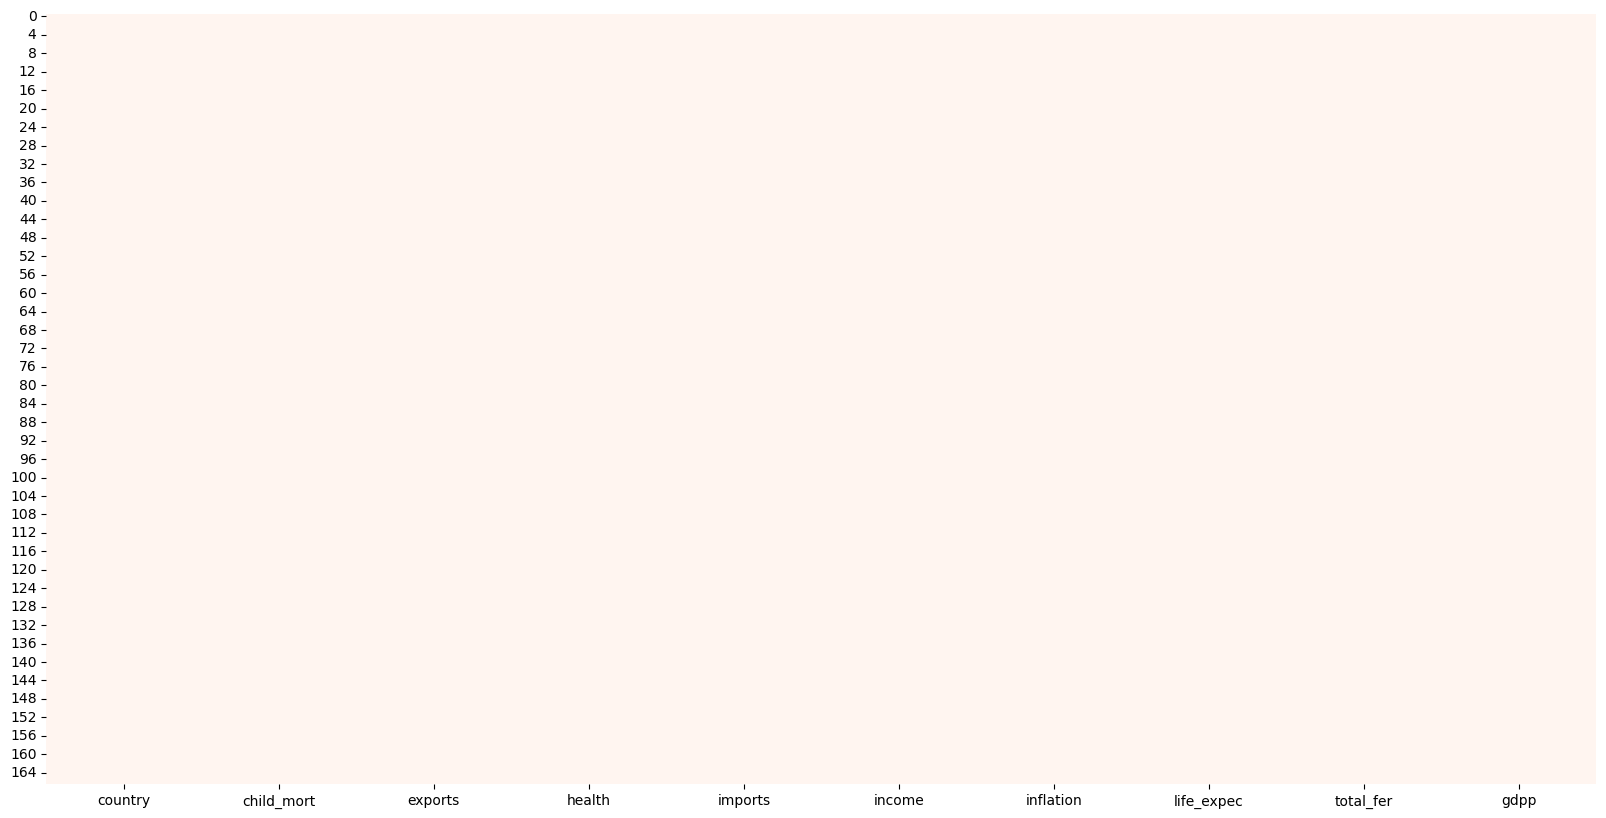

In [95]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cmap='Reds',cbar=False)


Il y a 0 valeurs manquantes.

### Analyse du Fond:

In [96]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


##### Analyse du variables quantitatives :

In [97]:
for col in df.select_dtypes(np.number):
    print(col)

child_mort
exports
health
imports
income
inflation
life_expec
total_fer
gdpp


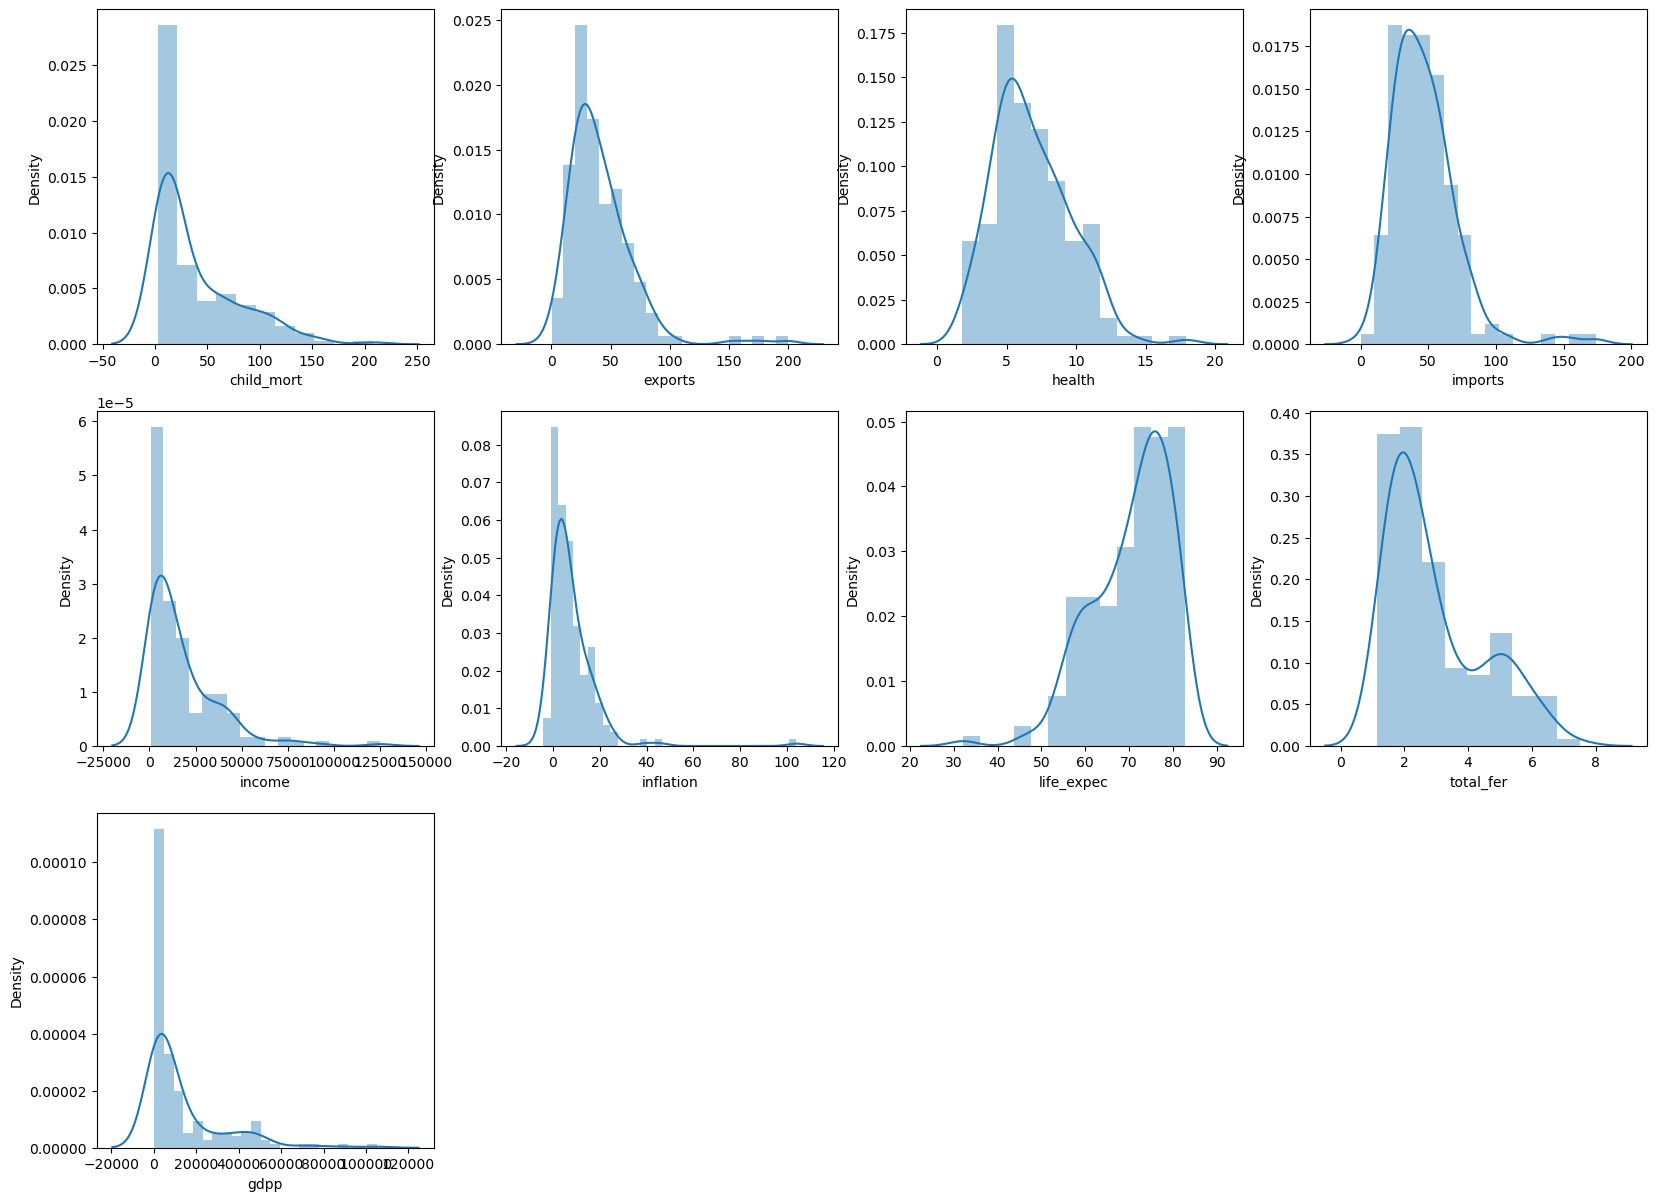

In [98]:
i=1
plt.figure(figsize=(20,20))
for col in df.select_dtypes(np.number):
    plt.subplot(4,4, i)
    sns.distplot(df[col])
    i += 1
plt.show()

Toutes les distributions sont asymétrique


##### Analyse du variables qualitatives:

In [99]:
for col in df.select_dtypes('object'):
    print(f'{col:-<30}{df[col].unique()}')


country-----------------------['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'L

La colonnes country est un identifiant unique .

#### Relation entre les variables quantitatives:

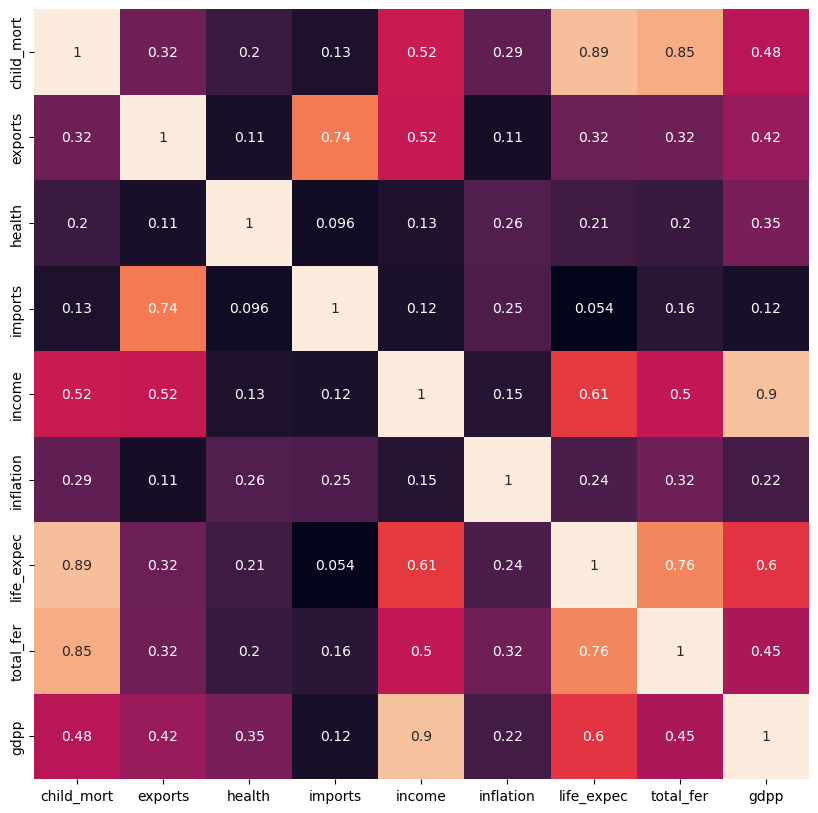

In [100]:
plt.figure(figsize=(10,10))
correlation=df.select_dtypes(np.number).corr().abs()
sns.heatmap(correlation, annot=True,cbar=False)
plt.show()

la correlation entre gpp et income semble rès elever (0.9).Ce qui ont un couleur plus claire une forte correlation. 

## PRE-PROCESSING:

In [101]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.cluster import KMeans
import sklearn.decomposition as decomposition

In [102]:
def normalisation (df):
# Initialize the StandardScaler
    scaler = StandardScaler()
# Fit the StandardScaler and transform the data
    for col in df.select_dtypes(np.number):
        normalized_data = scaler.fit_transform(df[[col]])
        df[col] = normalized_data
        
    return df.drop(columns="country")

In [103]:
X = normalisation (df)

### Clustering :

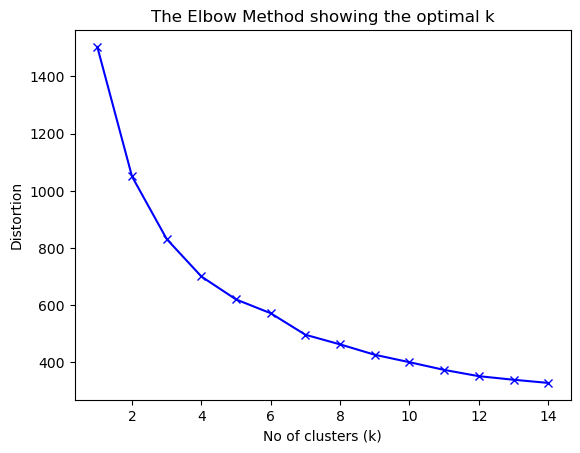

In [104]:
# k-means determine k
distortions = []
K = range(1, 15)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('No of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [105]:
model = KMeans(n_clusters=8)
model.fit(X)
df["label"] = model.labels_

In [106]:
df["label"].value_counts(ascending=True)

5     1
2     3
4     6
6     6
7    23
1    38
0    43
3    47
Name: label, dtype: int64

On remarque que le c'est dans le cluster 3 que les données sont nombreux.

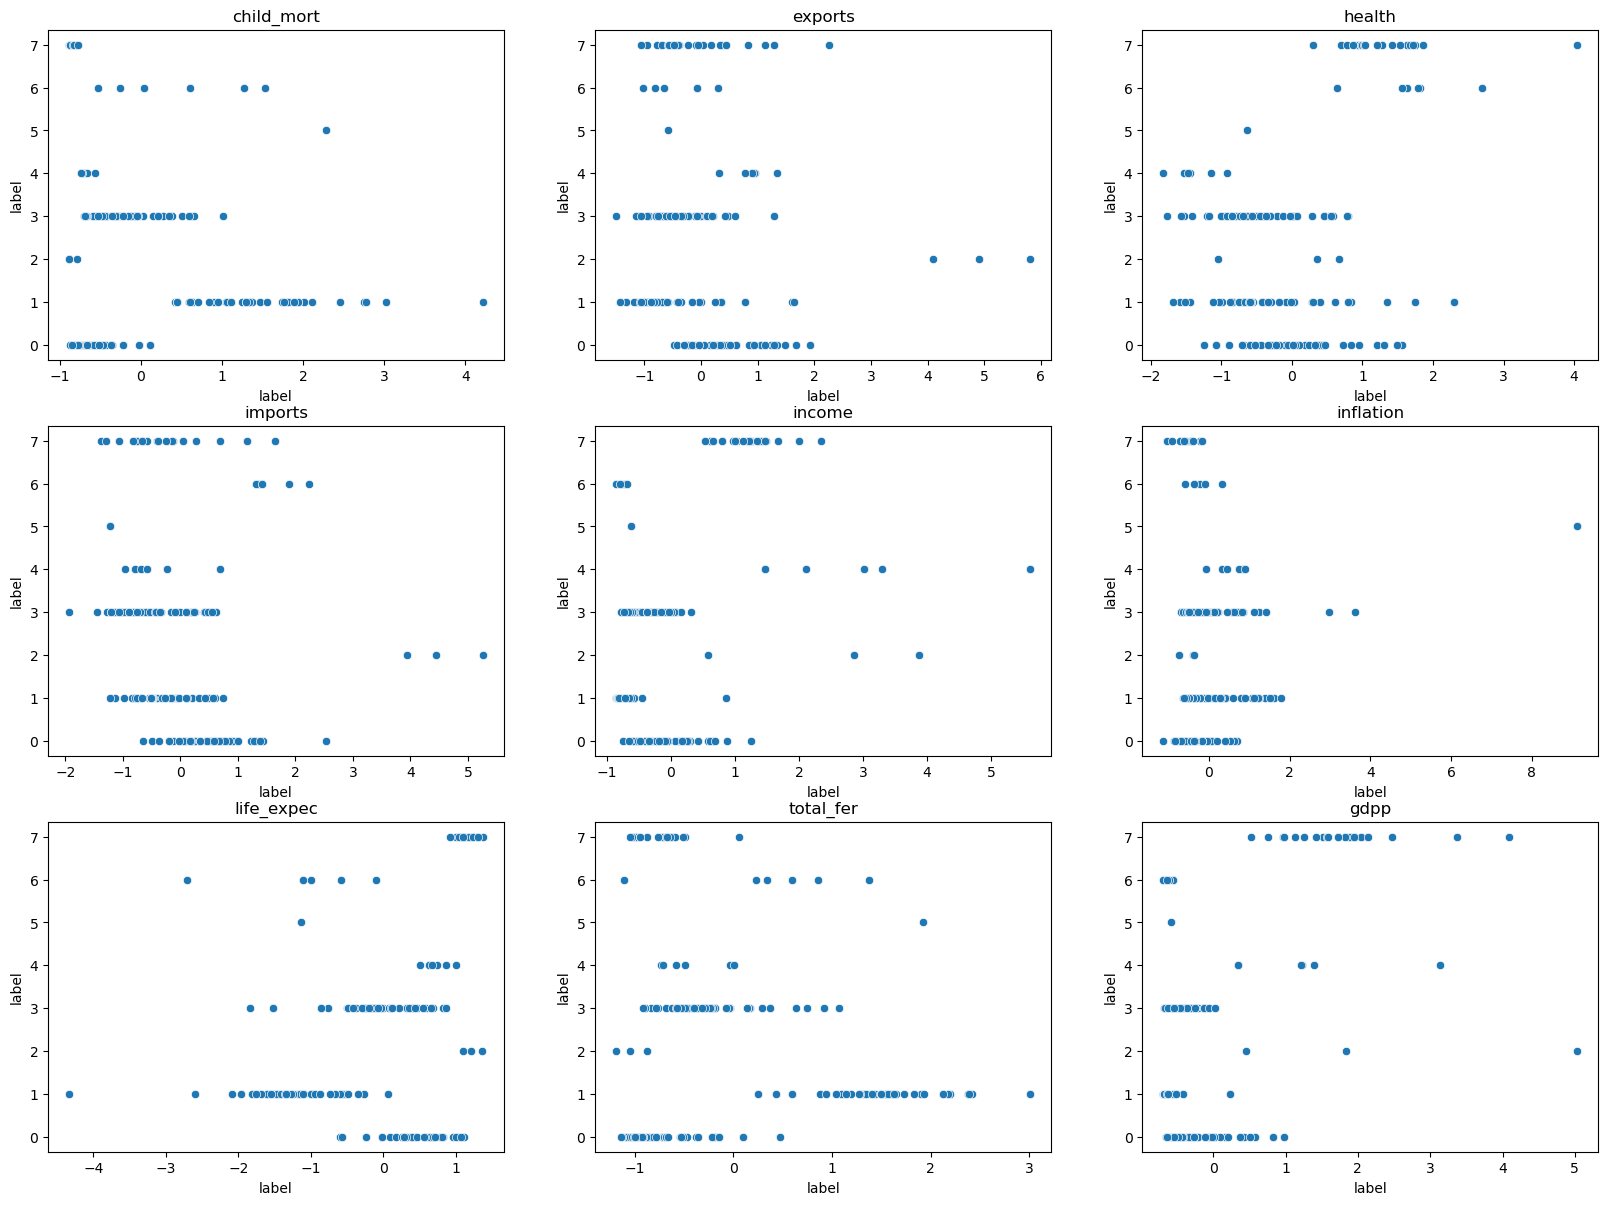

In [107]:
i=1
plt.figure(figsize=(20,30))

for col in X:
    plt.subplot(6,3,i)
    sns.scatterplot(data=df, x=col, y="label")
    plt.xlabel("label")
    plt.title(col)
    i += 1
plt.show()


Les diagrammes en dispersion de l'image montrent que de nombreuses variables économiques et sociales sont liées entre elles. Ces relations peuvent fournir des informations précieuses sur les facteurs qui contribuent au développement économique et social.

### Modelisation:

### PCA:

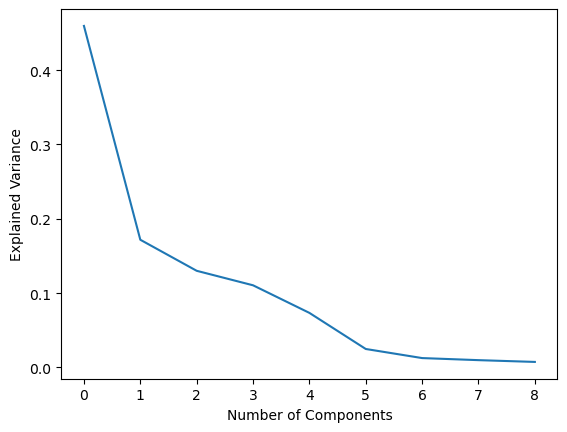

In [108]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
plt.figure()
plt.plot(range(len(explained_variance)), explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()


On remarque que notre coude se situe au niveau de 1.0.c'est donc le nombre de components que l'on cherche.


In [109]:
pca = PCA(n_components=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de PCA sur les données
X_pca = pca.fit_transform(X_scaled)


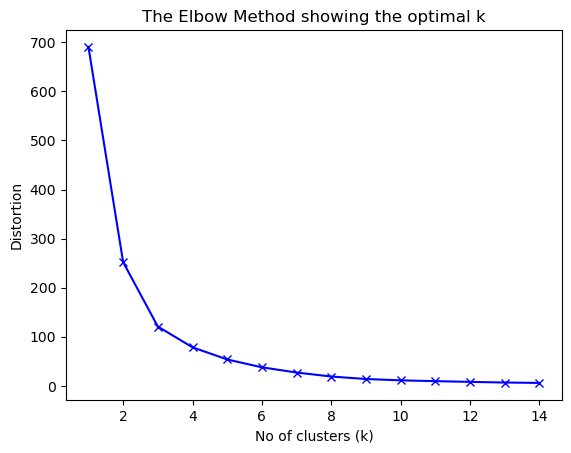

In [110]:
# k-means determine k
distortions = []
K = range(1, 15)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_pca )
    distortions.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('No of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### t-SEAN:

In [111]:
from sklearn.manifold import TSNE


In [112]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

# Application de t-SNE sur les données
X_tsne = tsne.fit_transform(X)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 167 samples in 0.000s...
[t-SNE] Computed neighbors for 167 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 167 / 167
[t-SNE] Mean sigma: 1.287372
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.394821
[t-SNE] KL divergence after 300 iterations: 0.378537


In [113]:
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Application de DBSCAN sur les données
clusters = dbscan.fit_predict(X)


In [114]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Exécution de DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_pca)

# Exécution de t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X_pca)

# Calcul du score de silhouette pour chaque méthode
score_pca = silhouette_score(X_pca, KMeans().fit(X_pca).labels_)
score_dbscan = silhouette_score(X_pca, dbscan.labels_)
score_tsne = silhouette_score(X_tsne, KMeans().fit(X_tsne).labels_)

# Affichage des scores de silhouette
print('Score de silhouette pour PCA: ', score_pca)
print('Score de silhouette pour DBSCAN: ', score_dbscan)
print('Score de silhouette pour t-SNE: ', score_tsne)



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 167 samples in 0.000s...
[t-SNE] Computed neighbors for 167 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 167 / 167
[t-SNE] Mean sigma: 0.912602
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.175522
[t-SNE] KL divergence after 300 iterations: 0.270554
Score de silhouette pour PCA:  0.35565847801630185
Score de silhouette pour DBSCAN:  -0.257524270826034
Score de silhouette pour t-SNE:  0.38400576



Selon le score , on peut en deduire que le t-sen semble avoir le meilleur score des trois méthodes.

In [115]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
preprocessor = make_pipeline(PolynomialFeatures(2 , include_bias=False),SelectKBest(f_classif,k=10))

In [142]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=3)
X_trans = tsne.fit_transform(X_scaled)

# Create a pipeline with PCA
pipe = Pipeline([
 ('pca', PCA(n_components=1))
])

# Run the pipeline on your data
X_transformed = pipe.fit_transform(X_trans)

# Fit the model
model = KMeans(n_clusters=4)
model.fit(X_transformed)

# Get the cluster labels for each data point
labels = model.predict(X_transformed)

# Calculate the silhouette score
silhouette = silhouette_score(X_transformed, labels)
print('Silhouette Score: ', silhouette)

Silhouette Score:  0.5342596


# CUSTOMERS :

## EXPLORATORY DATA ANALYSIS :

In [117]:
customers = pd.read_csv("customers_data.csv")

In [118]:
df1 = customers.copy()

In [119]:
df1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


### Analyse de forme:

### Analyse du tableau :

In [120]:
df1.shape

(440, 11)

On a donc un tableau avec 167 lignes et 10 colonnes à étudier.

<Axes: >

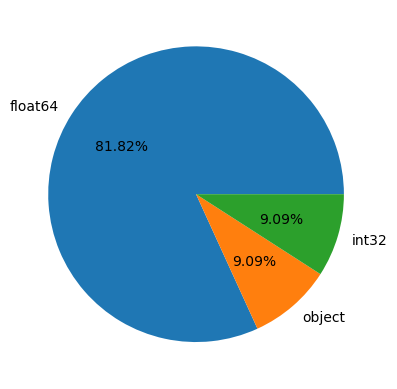

In [121]:
def pct(pct):
    return str(round(pct, 2)) + '%'
df.dtypes.value_counts().plot.pie(autopct=pct)

On a  un tableau avec plus de variable quantitatives que qualitative .

#### Analyses des valeurs manquantes :

<Axes: >

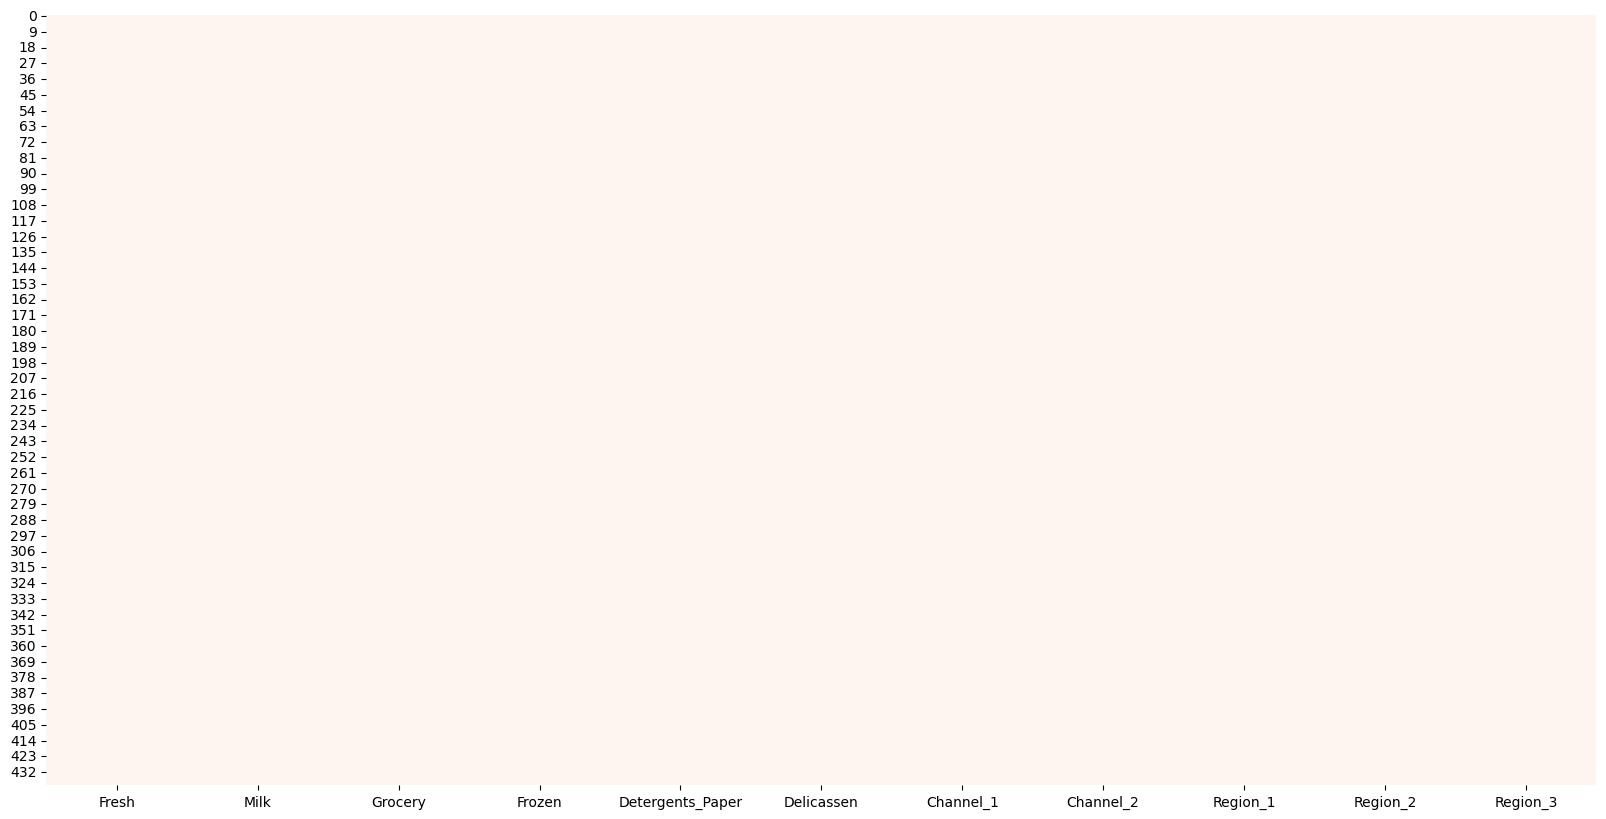

In [122]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.isna(),cmap='Reds',cbar=False)


### Analyse du Fond:

##### Analyse du variables quantitatives :

In [123]:
df1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [124]:
for col in df1.select_dtypes(np.number):
    print(col)

Fresh
Milk
Grocery
Frozen
Detergents_Paper
Delicassen
Channel_1
Channel_2
Region_1
Region_2
Region_3


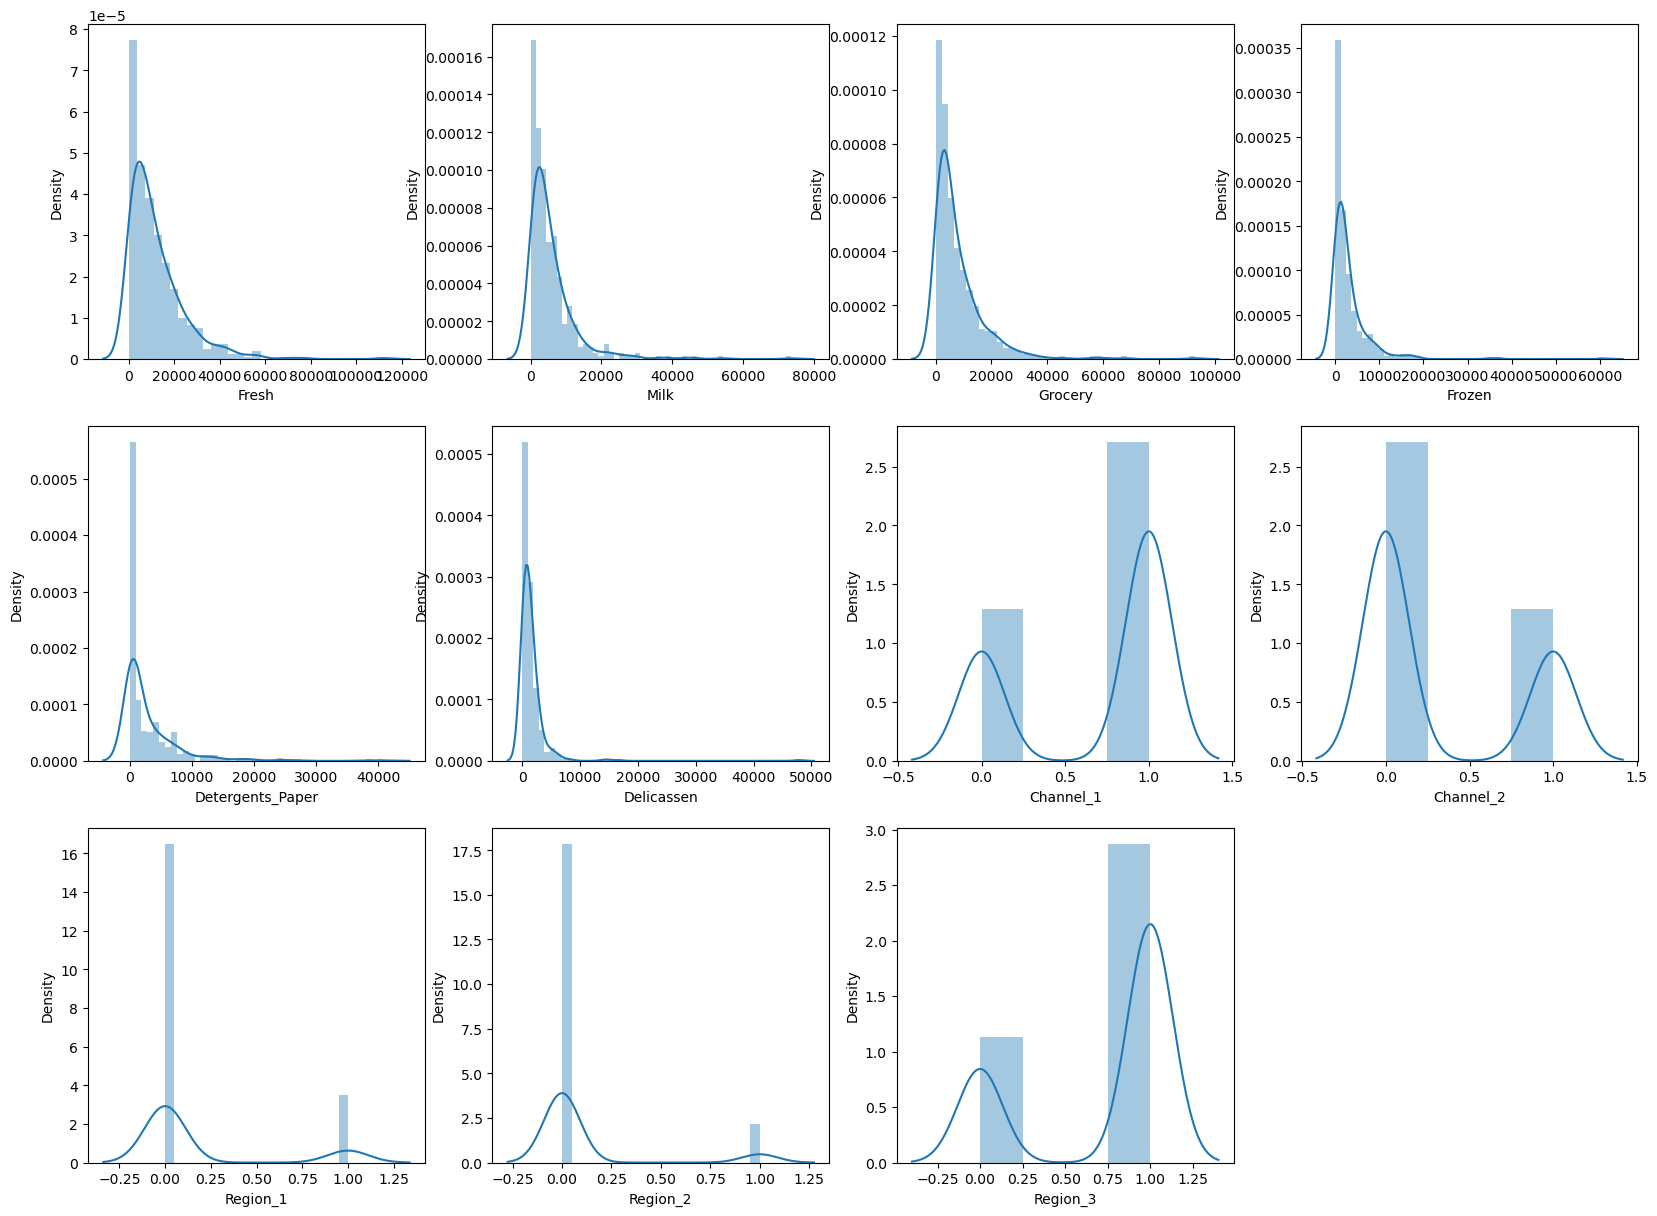

In [125]:
i=1
plt.figure(figsize=(20,20))
for col in df1.select_dtypes(np.number):
    plt.subplot(4,4, i)
    sns.distplot(df1[col])
    i += 1
plt.show()

#### Relation entre les variables quantitatives:

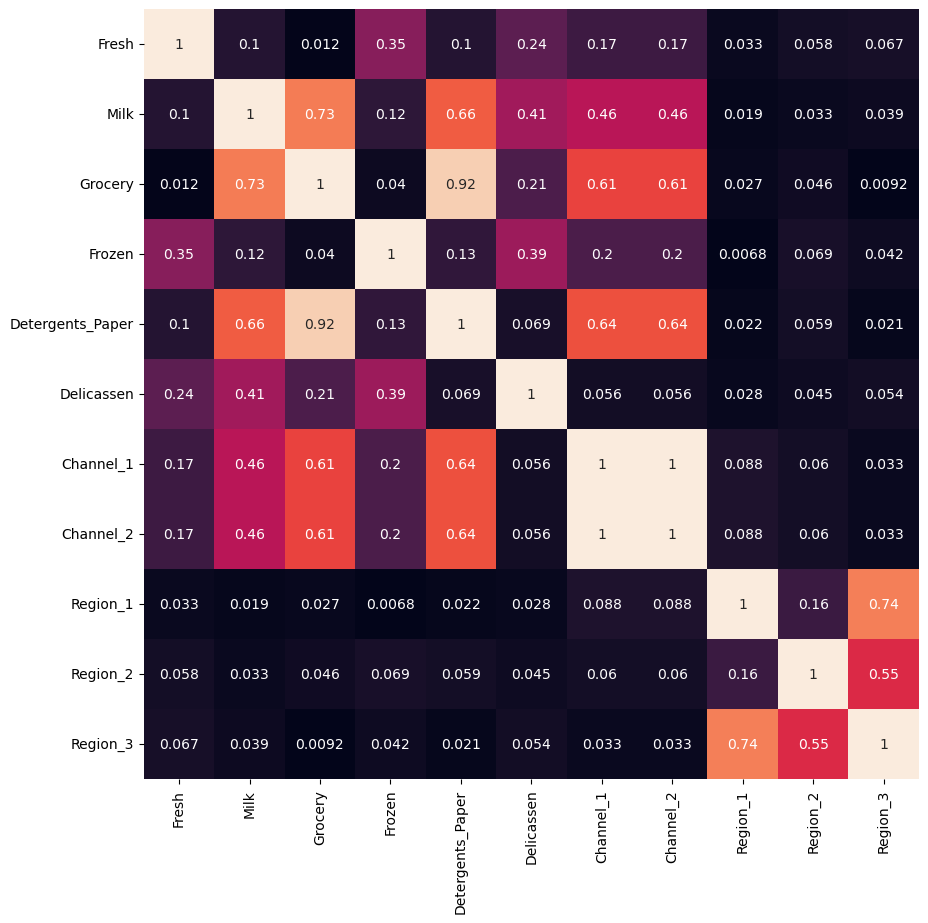

In [126]:
plt.figure(figsize=(10,10))
correlation=df1.select_dtypes(np.number).corr().abs()
sns.heatmap(correlation, annot=True,cbar=False)
plt.show()

Ce qui ont un couleur plus claire ont une forte correlation. 

## PRE-PROCESSING:

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [128]:
def normalisation (df):
# Initialize the StandardScaler
    scaler = StandardScaler()
# Fit the StandardScaler and transform the data
    for col in df1.select_dtypes(np.number):
        normalized_data = scaler.fit_transform(df1[[col]])
        df1[col] = normalized_data
        
    return df

In [129]:
Y= normalisation (df1)

### Clustering :

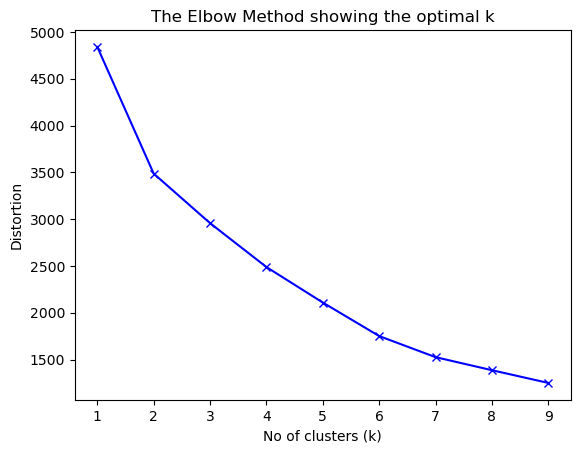

In [130]:
# k-means determine k
distortions = []
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Y)
    distortions.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('No of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [131]:
model1 = KMeans(n_clusters=5)
model1.fit(Y)
df1["label"] = model1.labels_

In [132]:
df1["label"].value_counts(ascending=True)

4     13
3     46
2     65
0    107
1    209
Name: label, dtype: int64

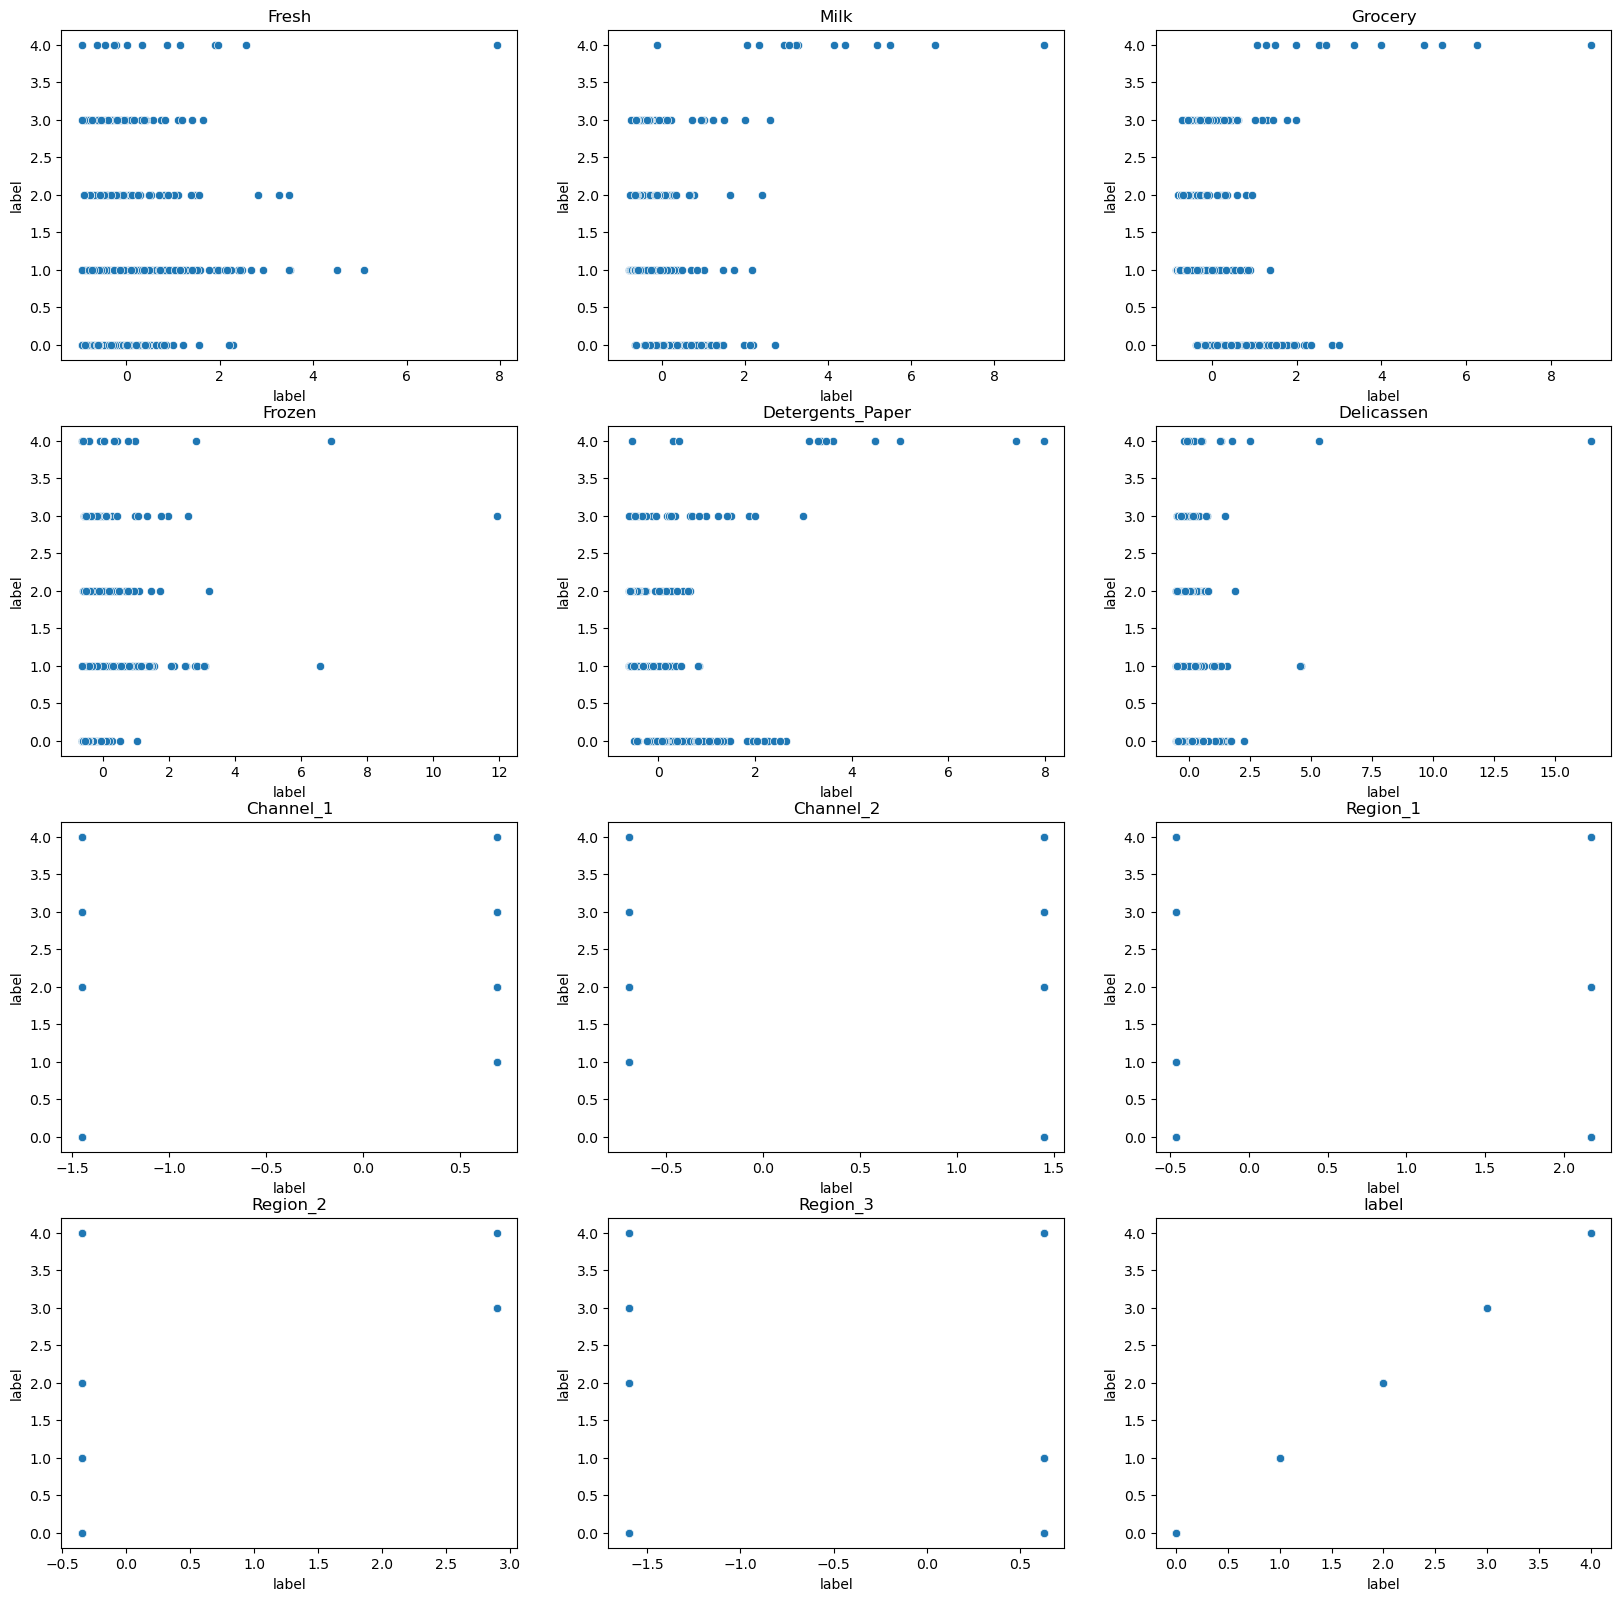

In [133]:
i=1
plt.figure(figsize=(20,30))

for col in Y:
    plt.subplot(6,3,i)
    sns.scatterplot(data=df1, x=col, y="label")
    plt.xlabel("label")
    plt.title(col)
    i += 1
plt.show()

Les graphiques montrent une grande variabilité des données. Il n'y a pas de relation linéaire claire entre la plupart des variables.
Il y a quelques valeurs aberrantes dans les données, qui pourraient être dues à des erreurs de mesure ou à des différences réelles entre les échantillons.
La couleur des points semble être liée à la valeur de la variable "Région 1". En général, les points sont plus rouges dans la région supérieure gauche et plus bleus dans la région inférieure droite.